In [ ]:
import tensorflow as tf
print("Version of tensorflow is : ",tf.__version__)
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.models import Model
from tensorflow.nn import relu , sigmoid
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot


import os
os.chdir("/content/drive/MyDrive/Tensorflow Advance/Custom_Models_Layers_and_Loss_Functions_with_TensorFlow/Week1")
print("Current dir is : ",os.getcwd())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")

In [15]:
data = pd.read_excel("data.xlsx")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [16]:
mean = data.describe().iloc[1]
mean

X1      0.764167
X2    671.708333
X3    318.500000
X4    176.604167
X5      5.250000
X6      3.500000
X7      0.234375
X8      2.812500
Y1     22.307195
Y2     24.587760
Name: mean, dtype: float64

In [17]:
data = data- mean

In [18]:
std = data.describe().iloc[2]
std

X1     0.105777
X2    88.086116
X3    43.626481
X4    45.165950
X5     1.751140
X6     1.118763
X7     0.133221
X8     1.550960
Y1    10.090204
Y2     9.513306
Name: std, dtype: float64

Normalize the data

In [19]:
data = data / std

In [20]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.7593,-1.813393,-0.669679,-0.342443
1,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.7593,-1.813393,-0.669679,-0.342443
2,2.040447,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.7593,-1.813393,-0.669679,-0.342443
3,2.040447,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.7593,-1.813393,-0.669679,-0.342443
4,1.284142,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.7593,-1.813393,-0.145408,0.388113


In [21]:
(train , test) = train_test_split(data , test_size=0.2)

In [22]:
print("Train shape : ",train.shape)
print("Test shape : ",test.shape)

Train shape :  (614, 10)
Test shape :  (154, 10)


In [23]:
train_y1 = train.pop('Y1')
train_y2 = train.pop('Y2')
train_x  = train.values

test_y1  = test.pop('Y1')
test_y2  = test.pop('Y2')
test_x   = test.values

In [24]:
print("Shape of train_y1 : ",train_y1.shape)
print("Shape of train_y2 : ",train_y2.shape)
print("Shape of train_x  : ",train_x.shape)
print("-------------------------------------")
print("Shape of test_y1  : ",test_y1.shape)
print("Shape of test_y2  : ",test_y2.shape)
print("Shape of test_x   : ",test_x.shape)


Shape of train_y1 :  (614,)
Shape of train_y2 :  (614,)
Shape of train_x  :  (614, 8)
-------------------------------------
Shape of test_y1  :  (154,)
Shape of test_y2  :  (154,)
Shape of test_x   :  (154, 8)


In [29]:
def get_model():
  input_layer = Input(shape=(8 , ))
  layer1 = Dense(128 , activation=relu)(input_layer)
  layer2 = Dense(128 , activation=relu)(layer1)
  y1_output = Dense(1 , activation=sigmoid , name="y1_output")(layer2)
  layer3 = Dense(128 , activation=relu)(layer2)
  y2_output = Dense(1 , activation=sigmoid , name="y2_output")(layer3)
  model = Model(inputs=input_layer , outputs=[y1_output , y2_output])
  optimizer = tf.keras.optimizers.SGD(0.001)
  model.compile(
      optimizer = optimizer,
      loss = {
          'y1_output' : 'mse',
          'y2_output' : 'mse'
      },
      metrics = {
          'y1_output' : tf.keras.metrics.RootMeanSquaredError(),
          'y2_output' : tf.keras.metrics.RootMeanSquaredError(),
      }
  )
  return model

In [30]:
model = get_model()

In [31]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          16512       dense_1[0][0]                    
_______________________________________________________________________________________

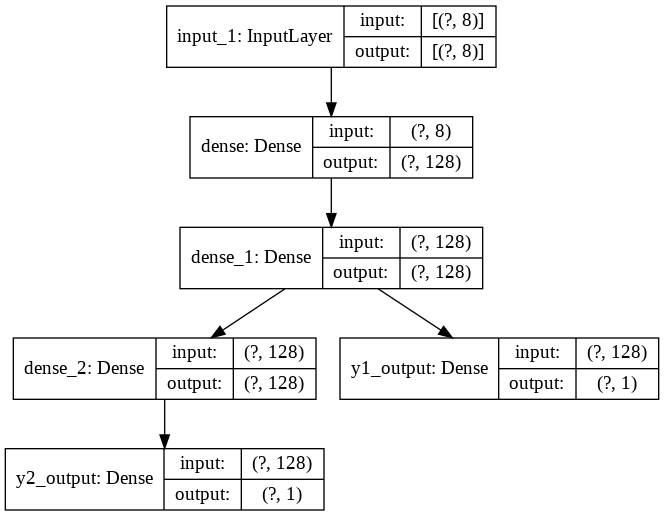

In [34]:
plot_model(model , to_file="multi_output.png",show_shapes=True , show_layer_names=True)

In [35]:
history = model.fit(train_x , [train_y1 , train_y2] , epochs=2000 , batch_size=10 , validation_data=(test_x , [test_y1,test_y2]))

Epoch 1/2000
62/62 [==============================] - 0s 7ms/step - loss: 2.3936 - y1_output_loss: 1.2174 - y2_output_loss: 1.1762 - y1_output_root_mean_squared_error: 1.1034 - y2_output_root_mean_squared_error: 1.0845 - val_loss: 2.5770 - val_y1_output_loss: 1.3514 - val_y2_output_loss: 1.2255 - val_y1_output_root_mean_squared_error: 1.1625 - val_y2_output_root_mean_squared_error: 1.1070
Epoch 2/2000
62/62 [==============================] - 0s 4ms/step - loss: 2.3183 - y1_output_loss: 1.1714 - y2_output_loss: 1.1469 - y1_output_root_mean_squared_error: 1.0823 - y2_output_root_mean_squared_error: 1.0709 - val_loss: 2.4907 - val_y1_output_loss: 1.2995 - val_y2_output_loss: 1.1913 - val_y1_output_root_mean_squared_error: 1.1400 - val_y2_output_root_mean_squared_error: 1.0914
Epoch 3/2000
62/62 [==============================] - 0s 4ms/step - loss: 2.2456 - y1_output_loss: 1.1275 - y2_output_loss: 1.1181 - y1_output_root_mean_squared_error: 1.0618 - y2_output_root_mean_squared_error: 1.05

In [36]:
model.evaluate(test_x , [test_y1 , test_y2])

5/5 [==============================] - 0s 3ms/step - loss: 1.1444 - y1_output_loss: 0.5814 - y2_output_loss: 0.5630 - y1_output_root_mean_squared_error: 0.7625 - y2_output_root_mean_squared_error: 0.7503


[1.1444181203842163,
 0.5814214944839478,
 0.5629965662956238,
 0.7625100016593933,
 0.7503309845924377]